# Uygulama Notları: 5
## FİZ219 - Bilgisayar Programlama I | 10/11/2019

* Döngü kullanarak, temel işlemlerle en küçük kareler yöntemi

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>


Bir deneyde, kontrol parametremiz olan x'lere karşı y sonuçlarını şu şekilde elde etmiş olalım:

In [1]:
veriler = [1 4.9142    
2 7.1201    
3 8.8456   
4 10.8113   
5 13.2231] % ilk sütun x, ikinci sütun y değerleri

veriler =

    1.0000    4.9142
    2.0000    7.1201
    3.0000    8.8456
    4.0000   10.8113
    5.0000   13.2231



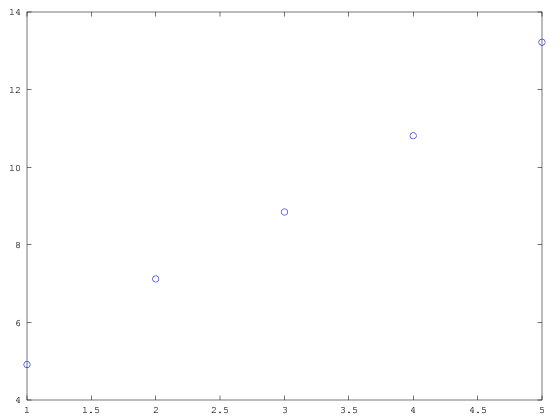

In [2]:
% Grafiğini çizdirirsek:
plot(veriler(:,1),veriler(:,2),"bo")

Epey doğrusal görünüyorlar. Amacımız bu noktalara en yakın geçen doğru denklemini hesaplamak. Doğru denklemi y=mx+n olduğundan, yapmamız gereken eğimi veren "m" değeri ile, doğrunun y-eksenin kestiği "n" değerini bulabilmek. 

_"3. Uygulama Notları"nda, for döngüsünü henüz öğrenmemiş olduğumuzdan dolayı, belirli sayıdaki veri için tek tek hesap yapmıştık, türevleri alırken de doğrudan elle alıp, o şekilde bulduğumuzdan ötürü, bir başka veri setine uyarlamak mümkün olmuyordu._

## En küçük kareler yöntemi
Bu yöntemde elimizde bir y=mx+n doğrusunun olduğu varsayımıyla başlarız. Bu doğrunun elimizdeki x değerlerine karşılık gelen değerlerinin (bu değerleri "t" ile gösterelim) deneyde bulduğumuz y değerleri arasındaki mesafeleri hesaplayıp, bu mesafeleri mümkün oldukça küçük yapacak m ve n değerlerini bulmaya çalışırız.

Elimizdeki veriden x ve y değerlerini ayrı listelere alalım:

In [3]:
veriler = [1 4.9142    
2 7.1201    
3 8.8456   
4 10.8113   
5 13.2231] % ilk sütun x, ikinci sütun y değerleri
x = veriler(:,1) % Tüm satırlar (":"), 1. sütun
y = veriler(:,2) % Tüm satırlar (":"), 2. sütun

veriler =

    1.0000    4.9142
    2.0000    7.1201
    3.0000    8.8456
    4.0000   10.8113
    5.0000   13.2231

x =

   1
   2
   3
   4
   5

y =

    4.9142
    7.1201
    8.8456
   10.8113
   13.2231



Octave'da doğrudan sembolik hesap yapılmadığından (yani "m" ve "n" olarak bilinmeyenleri denklemlere sokamayacağımızdan), işlemlerimizi "kağıt" üzerinde açalım:

Elimizde 5 adet veri ikilisi var. Bu ikililerin her birini x(i) ve y(i) ile gösterelim.

Örneğin: 

    x(4) = 4.0
    y(4) = 10.8113
    
Doğrunun denkleminde x(i)ye karşılık gelen değeri t(i) ile gösterecek olursak, $t_i = mx_i+n$ olur (örneğin, t(4) = m*(4.0) + n).

Doğru denkleminden bulduğumuz değer ile deneyde bulduğumuz değer arasındaki mesafe:

\begin{equation*}
\mid{t_i - y_i}\mid = \sqrt{{(t_i - y_i)}^2}
\end{equation*}

olarak tanımlanır. Biz bu değerin kendisinden çok, bu değeri minimum yapmakla, yani doğruyu noktaya mümkün olduğunca yakın geçirmekle ilgilendiğimizden dolayı hem işlemden tasarruf sağlamak (karenin kökü yerine sadece kare alma işlemi), hem de minimize ederken türev almak gerekliliğinden dolayı (mutlak değer fonksiyonunun 0 noktasında türevi tanımlı değildir) aralarındaki mesafenin karesini minimize edeceğiz (mesafenin karesi minimize olduğunda, mesafenin kendisi de minimize olmuş olur ne de olsa).

Bu durumda, doğrunun üzerindeki nokta ile deneyde okunan değerin aralarındaki farkın karesine "s" diyelim:

\begin{equation*}
s_i = (y_i - (m x_i + n))^2
\end{equation*}

ve parentezi açınca da:

\begin{align}
s_i &= (y_i - (m x_i + n))^2 = y_i^2 - 2 y_i(mx_i+n) + (mx_i+n)^2\\
s_i &= y_i^2 - 2m x_i y_i -2n y_i +m^2 x_i^2 +2 m n x_i + n^2
\end{align}

Toplam hata her bir veri çiftinden gelen hataların (farkların) toplamına eşit olacak ($S = \sum_{i=1}^N s_i$). 

Toplam hatayı denklem cinsinden yazacak olursak:

\begin{align}
S = \sum_{i=1}^N s_i = \sum_{i=1}^N (y_i^2 - 2m x_i y_i -2n y_i +m^2 x_i^2 +2 m n x_i + n^2)
\end{align}

Toplam hatanın iki tane parametresi (ve bizim için bilinmeyeni) var: m & n. Denklemi minimize edecek m & n değerlerini bulabilmek için her birine göre türev alıp, sıfıra eşitleriz:

\begin{align}
\frac{\partial S}{\partial m} &= \sum_{i=1}^N \frac{\partial s_i}{\partial m} = \sum_{i=1}^N (-2 x_i y_i + 2 m x_i^2 + 2 n x_i) = 0\\
\frac{\partial S}{\partial n} &= \sum_{i=1}^N \frac{\partial s_i}{\partial n} = \sum_{i=1}^N (-2 y_i + 2 m x_i + 2 n) = 0
\end{align}

işimiz bitmedi ama az kaldı... 8) 

Elimizde iki adet, iki bilinmeyenli eşitlik var (hataların m ve n'ye göre türevleri ve onların sıfıra eşit oluşları). Denklemleri m ve n'nin çarpanları olacak şekilde düzenlersek:

\begin{align}
(\sum_{i=1}^N 2x_i^2)m + (\sum_{i=1}^N 2x_i)n &= (\sum_{i=1}^N  2x_i y_i)\\
(\sum_{i=1}^N 2x_i)m + (\sum_{i=1}^N 2)n &= (\sum_{i=1}^N 2 y_i)
\end{align}

Parantez içindeki bütün terimleri x(i) ve y(i)leri bildiğimizden dolayı döngü üzerinden hesaplatabiliriz. 

Kolay anlaşılması açısından:

\begin{equation*}
A_{11} = \sum_{i=1}^N 2x_i^2 ,\quad A_{12} = A_{21} = \sum_{i=1}^N 2x_i,\quad A_{22} = \sum_{i=1}^N 2\\
B_{11} = \sum_{i=1}^N  2x_i y_i,\quad B_{12} = \sum_{i=1}^N 2 y_i
\end{equation*}

dersek, denklemlerimiz:

\begin{equation*}
A_{11}m + A_{12}n = B_{11}\\
A_{12}m + A_{22}n = B_{12}
\end{equation*}

halini alırlar. İkinci denklemde n'yi m cinsinden yazarsak:

\begin{equation*}
n = \frac{B_{12} - A_{12}m }{A_{22}}
\end{equation*}

bulunur; bunu da götürüp birinci denklemde n gördüğümüz yere yazdığımızda m'yi:

\begin{equation*}
A_{11}m + A_{12} \left(\frac{B_{12} - A_{12}m }{A_{22}} \right)  = B_{11}\\
A_{11}m + \frac{A_{12} B_{12}}{A_{22}} - \frac{A_{12}^2 m}{A_{22}} = B_{11}\\
\left(A_{11} - \frac{A_{12}^2 }{A_{22}}\right)m + \frac{A_{12} B_{12}}{A_{22}}  = B_{11}\\
\Rightarrow m = \frac{\left(B_{11} - \frac{A_{12} B_{12}}{A_{22}}\right)}{\left(A_{11} - \frac{A_{12}^2}{A_{22}}\right)}
\end{equation*}

olarak buluruz. 

Artık m'yi bildiğimize göre, n'nin tanımında yerine koyarak, n'yi de elde ederiz:

\begin{equation*}
n = \frac{B_{12} - A_{12}m }{A_{22}}
\end{equation*}

Denklemlerin çıkarımı biraz karışık gelse bile, önemli olan sonuçlar, çıkarımlardan başınız ağrıdıysa, sadece son A ile B'lerin tanımları ve m ile n'in onlar cinsinden eşitliklerini bilin. Zira formüller artık elimizde olduğundan, birazdan aşağıda göreceğiniz gibi, her şeyi kolayca hesaplayacağız! 8)

veriler =

    1.0000    4.9142
    2.0000    7.1201
    3.0000    8.8456
    4.0000   10.8113
    5.0000   13.2231

m =  2.0309
n =  2.8902


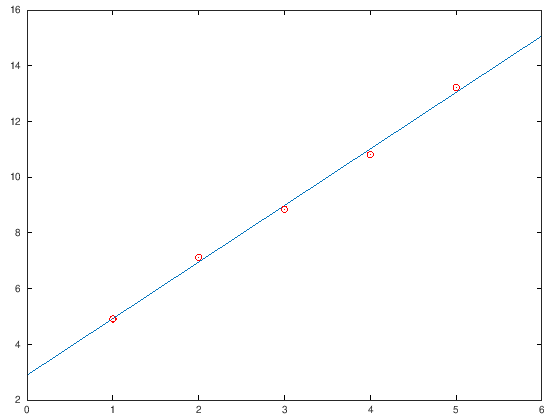

In [3]:
veriler = [1 4.9142    
2 7.1201    
3 8.8456   
4 10.8113   
5 13.2231] % ilk sütun x, ikinci sütun y değerleri

x = veriler(:,1); % Tüm satırlar (":"), 1. sütun
y = veriler(:,2); % Tüm satırlar (":"), 2. sütun
A11 = A12 = A22 = B11 = B12 = 0; % Hesaplanacak değerler
N = rows(x); % Kaç adet verimiz olduğu
for i = 1:N
    A11 = A11 + 2*x(i)^2;
    A12 = A12 + 2*x(i);
    A22 = A22 + 2;
    B11 = B11 + 2*x(i)*y(i);
    B12 = B12 + 2*y(i);
endfor

% Toplamlar hesaplandı bile! 8)
m = (B11 - (A12 * B12 / A22))  / (A11 - (A12^2 / A22))
n = (B12 - A12 * m) / A22 

% Artık verilerimize en yakın geçen 
% doğrunun denklemi elimizde olduğuna göre
% hem doğruyu, hem de deney verilerini birlikte
% çizdirelim

xx = linspace(0,6,100);
tt = m.*xx + n;
plot(xx,tt,x,y,"ro")

## Son birkaç not:
* Yukarıda en son yazıp çalıştırdığımız kod, diğer verilerle de çalışacaktır (tek yapmanız gereken `veriler` matrisini kendi deney sonuçlarınıza göre değiştirmeniz).

* Doğruyu çizdirmek için yatay aralığı [0,6] aldım (`xx = linspace(0,6,100);` -- çünkü elimizdeki en büyük x değeri 5'ti). Diyelim ki sizin deneyinizde x değerleriniz 15 ile 38 arasında olsun. Bu durumda en uygun aralık bence [14,39] olur yani `xx = linspace(14,39,100);` yapmak lazım gelir, ama her seferinde bunu tek tek değiştirmek yerine ("deneyde kullandığımız en küçük x değeri" - 1) ile ("deneyde kullandığımız en büyük x değeri" + 1) şeklinde otomatik ayarlamak için: `xx = linspace(min(x)-1,max(x)+1,100);` işimizi fazlasıyla görecektir.

* $\left(\sum_{i=1}^N 2\right) = 2N$ veya $\left(\sum_{i=1}^N 2x_i\right) = 2\left(\sum_{i=1}^N x_i\right)$ olduğunu ben de biliyorum, gelin görün ki, her şeyi en açık haliyle göstermek istedim. ;)

* Normalde, N bilinmeyenli N denklemi bu şekilde kafa göz yara yara / göstere göstere çözmüyoruz. Bu işi en optimize şekliyle çözmek için yazılmış [komutlar](http://octave.org/doc/interpreter/Basic-Matrix-Functions.html#Basic-Matrix-Functions) ("A * x = b" şeklindeki lineer denklem setini çözmek için linsolve, 'A\b' operatörü, haydi hiçbiri olmadı, körlemesine inv(A)\*b) ve epey sağlam paketler (örn. [LAPACK](http://www.netlib.org/lapack/)) var, ama temelden çalıştığımız için açık açık çözdüm bu seferlik. 8)

* Lineer denklem çözmeyi boşverin, elinizdeki fonksiyonu (bizim bu örneğimizde hatalar toplamı `S` fonksiyonunu) minimize edecek değerleri doğrudan hesaplayan ve yine süper optimize komutlar da mevcut (misal: [fminunc ve arkadaşları](https://octave.org/doc/v4.0.1/Minimizers.html)).

_Yol uzun, hayat güzel, kod yazmak zevkli, önümüz bahar... 8)_